This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

#Importing an IMDB dataset from Keras. Here, we'll look at the 10000 words.

##Dividing the dataset into training and test sets.

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

#Simply printing the first review from the training dataset.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

##checking the first review's label

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

Decoding and displaying movie reviews in text

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
#As can be seen, the first review is positive, and the label is 1.

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
# #Here I am  using two hidden layers, each with 16 nodes, and only one node in the output layer for either +ve or -ve output. ReLu is used for hidden.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

##Adam is used as the optimizer, and binary crossentropy is used as the loss function.

In [11]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

###we're training our model with 20 epochs and 512 batches.

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5796 - accuracy: 0.7176 - val_loss: 0.4524 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3484 - accuracy: 0.8947 - val_loss: 0.3253 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2318 - accuracy: 0.9276 - val_loss: 0.2794 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1633 - accuracy: 0.9485 - val_loss: 0.2807 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1228 - accuracy: 0.9661 - val_loss: 0.2958 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0937 - accuracy: 0.9759 - val_loss: 0.3119 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0704 - accuracy: 0.9847 - val_loss: 0.3363 - val_accuracy: 0.8809
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

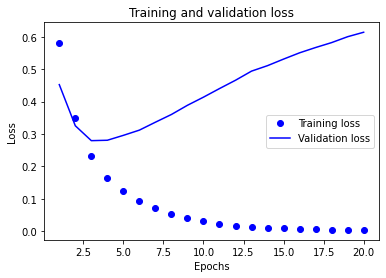

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Validation loss and overfitting begin to increase after the third epoch. As a result, we must remodel using three or four epochs.

**Plotting the training and validation accuracy**

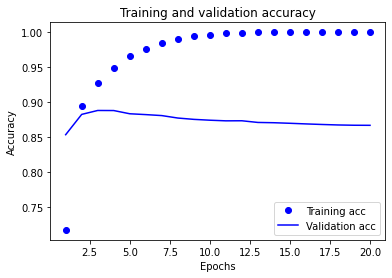

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation accuracy starts to decline around the third epoch.

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Here i am using three epochs to retrain the model here.
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 33ms/step - loss: 0.4979 - accuracy: 0.7956
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2574 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1873 - accuracy: 0.9348
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3027 - accuracy: 0.8815


In [19]:
results

[0.3026789724826813, 0.8814799785614014]

### Building your model

#### 1 using one or three hidden layers, and see how doing so 
affects validation and test accuracy.   

In [20]:
#I am creating a model with just 1 hidden layer and the ReLu activation function.
model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [21]:
# I am using three hidden layers here, with ReLu activation function and sigmoid for output layer.
model1_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
#Adam and binary crossentropy are used in both scenarios (3 and 1 layers)
model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
model1_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [24]:
# model fitting with 20 epochs and 512 batch size
history1_1 = model1_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5550 - accuracy: 0.7721 - val_loss: 0.4230 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3395 - accuracy: 0.8928 - val_loss: 0.3305 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2556 - accuracy: 0.9207 - val_loss: 0.2963 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2090 - accuracy: 0.9379 - val_loss: 0.2829 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1771 - accuracy: 0.9473 - val_loss: 0.2792 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1531 - accuracy: 0.9567 - val_loss: 0.2777 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1334 - accuracy: 0.9645 - val_loss: 0.2813 - val_accuracy: 0.8887
Epoch 8/20
30

In [25]:
history1_3 = model1_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5949 - accuracy: 0.6919 - val_loss: 0.4400 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3081 - accuracy: 0.9013 - val_loss: 0.2897 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1828 - accuracy: 0.9393 - val_loss: 0.2975 - val_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1285 - accuracy: 0.9601 - val_loss: 0.3090 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0902 - accuracy: 0.9733 - val_loss: 0.3323 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0626 - accuracy: 0.9861 - val_loss: 0.3785 - val_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0435 - accuracy: 0.9923 - val_loss: 0.4120 - val_accuracy: 0.8758
Epoch 8/20
30

plotting training vs validation loss

In [26]:
historyp1_1 = history1_1.history
historyp1_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
historyp1_3 = history1_1.history
historyp1_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

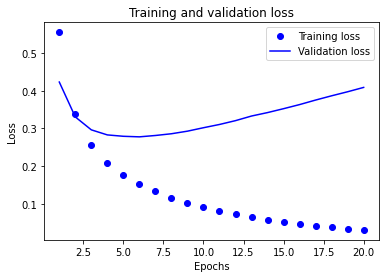

In [28]:
historyp1_1 = history1_1.history
loss_values1 = historyp1_1["loss"]
val_loss_values1 = historyp1_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

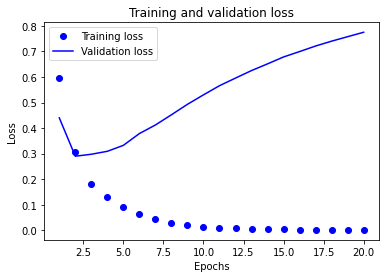

In [29]:
historyp1_3 = history1_3.history
loss_values3 = historyp1_3["loss"]
val_loss_values3 = historyp1_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

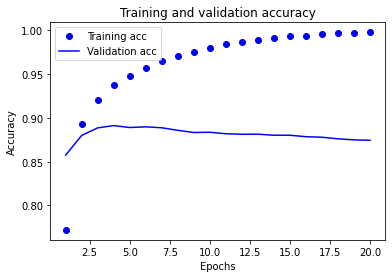

In [30]:
plt.clf()
acc1 = historyp1_1["accuracy"]
val_acc1 = historyp1_1["val_accuracy"]
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

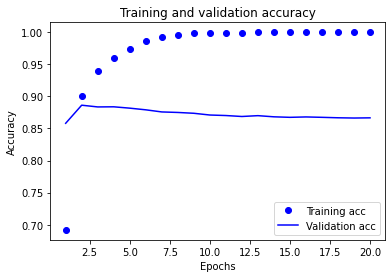

In [31]:
plt.clf()
acc3 = historyp1_3["accuracy"]
val_acc3 = historyp1_3["val_accuracy"]
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

When only one hidden layer is used, validation accuracy begins to decline after the fourth epoch while training accuracy continues to rise. The training loss clearly shows a decreasing trend in the graph, whereas the validation loss initially decreased but increased after the fifth epoch, indicating overfitting. When using three hidden layers, accuracy increased for two epochs and then began to fluctuate. Adding more layers resulted in less accuracy.

####2 For the  hidden layers  we are using  nodes 32 units, 64 units

In [32]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [33]:
model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [34]:
hist2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5203 - accuracy: 0.7681 - val_loss: 0.3393 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2428 - accuracy: 0.9117 - val_loss: 0.2833 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1513 - accuracy: 0.9488 - val_loss: 0.2885 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0.3255 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0655 - accuracy: 0.9837 - val_loss: 0.3693 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0407 - accuracy: 0.9921 - val_loss: 0.4121 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0233 - accuracy: 0.9970 - val_loss: 0.4634 - val_accuracy: 0.8730
Epoch 8/20
30

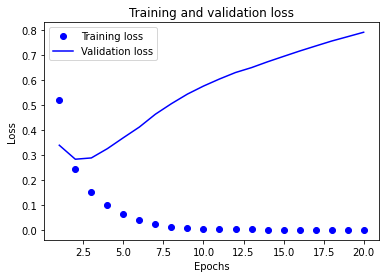

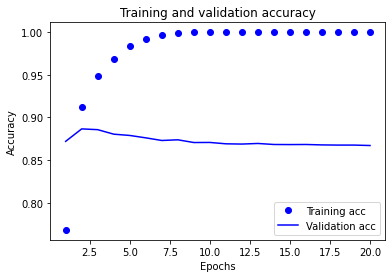

In [35]:
histp2 = hist2.history
loss_values = histp2["loss"]
val_loss_values = histp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp2["accuracy"]
val_acc = histp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Trraining loss is studied less during the training phase, whereas validation loss is studied more from the third epoch. Validation accuracy increased after the third epoch and gradually decreased after that. Increasing the number of nodes in the network resulted in a decrease in accuracy.

#3 using the mse loss function instead of binary_crossentropy.   

In [36]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [37]:
#So Here, I used the MSE loss function instead of the binary cross entropy that he has previously used.
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [38]:
hist3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1900 - accuracy: 0.7722 - val_loss: 0.1287 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0943 - accuracy: 0.9025 - val_loss: 0.0943 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0637 - accuracy: 0.9342 - val_loss: 0.0854 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0476 - accuracy: 0.9530 - val_loss: 0.0835 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0369 - accuracy: 0.9665 - val_loss: 0.0838 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0288 - accuracy: 0.9757 - val_loss: 0.0849 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0224 - accuracy: 0.9833 - val_loss: 0.0873 - val_accuracy: 0.8803
Epoch 8/20
30

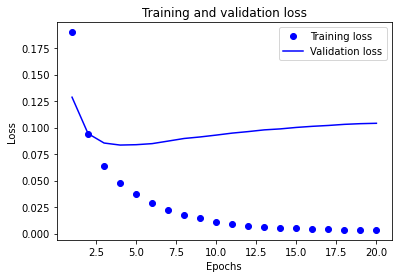

In [39]:

histp3 = hist3.history
loss_values = histp3["loss"]
val_loss_values = histp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

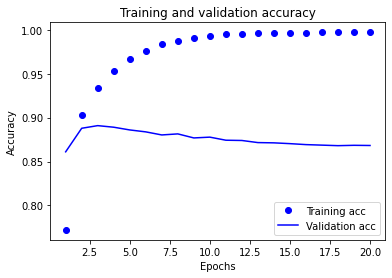

In [40]:
plt.clf()
acc = histp3["accuracy"]
val_acc = histp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

When SME is used instead of binary crossentropy, accuracy is more stable. Training and validation loss showed a similar trend until two epochs, when there is a significant difference. Validation accuracy began to decline after the fourth epoch when MSE was used as the loss function.

#4 I am using  tanh activation instead of relu. 

In [41]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [42]:
model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [43]:
hist4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.1580 - accuracy: 0.7921 - val_loss: 0.1071 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0738 - accuracy: 0.9142 - val_loss: 0.0858 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0491 - accuracy: 0.9473 - val_loss: 0.0833 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0344 - accuracy: 0.9671 - val_loss: 0.0842 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0250 - accuracy: 0.9782 - val_loss: 0.0873 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0187 - accuracy: 0.9853 - val_loss: 0.0915 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0140 - accuracy: 0.9891 - val_loss: 0.0946 - val_accuracy: 0.8737
Epoch 8/20
30

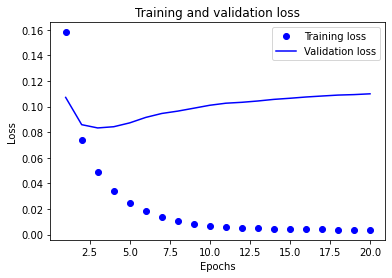

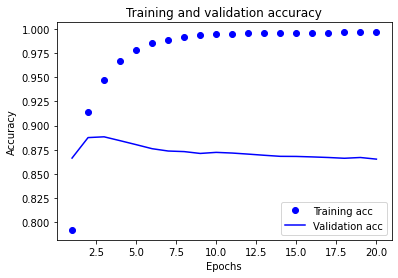

In [44]:
histp4 = hist4.history
loss_values = histp4["loss"]
val_loss_values = histp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp4["accuracy"]
val_acc = histp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

While training accuracy increased, validation accuracy increased until the second epoch and then declined. Validation loss increased more when ReLu was used than Tanh, and validation accuracy fluctuated more in ReLu than Tanh.

#5 In our network I am using Dropout Technique.

In [46]:
#I am using the dropout method with two hidden layers that have the ReLu activation function.
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [47]:
model5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [48]:
hist5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6380 - accuracy: 0.6597 - val_loss: 0.5233 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4824 - accuracy: 0.8091 - val_loss: 0.3869 - val_accuracy: 0.8708
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3696 - accuracy: 0.8639 - val_loss: 0.3180 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3010 - accuracy: 0.8924 - val_loss: 0.2849 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2504 - accuracy: 0.9128 - val_loss: 0.2721 - val_accuracy: 0.8925
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2099 - accuracy: 0.9283 - val_loss: 0.2690 - val_accuracy: 0.8911
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1825 - accuracy: 0.9373 - val_loss: 0.2743 - val_accuracy: 0.8891
Epoch 8/20
30

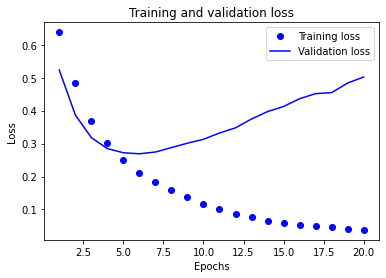

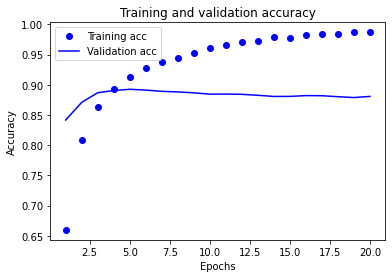

In [49]:
#Creating training vs. validation graphs Training vs. validation accuracy and loss
import matplotlib.pyplot as plt
histp5 = hist5.history
loss_values = histp5["loss"]
val_loss_values = histp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp5["accuracy"]
val_acc = histp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training accuracy steadily increased, whereas validation accuracy increased until 8 epochs and then nearly decreased. Using the dropout technique, accuracy improved over many epochs, and the graph showed no significant change in validation accuracy.